###############################################################################################################################

LOGISTIC REGRESSION for Truck Delivery Modeling
----------------------------------------------------------------------------------------

###############################################################################################################################

 By: Sara Khosravi
 ---------------------------


Instructor: MS.Giti  Saikia
---------------------------------------

###############################################################################################################################

### Logistic Regression Overview

Logistic regression is a fundamental classification technique. It belongs to the group of linear classifiers and is somewhat similar to polynomial and linear regression. Logistic regression is fast and relatively uncomplicated, and it’s convenient for you to interpret the results. Although it’s essentially a method for binary classification, it can also be applied to multiclass problems.

Independent variables, also called inputs or predictors, don’t depend on other features of interest (or at least you assume so for the purpose of the analysis).

Dependent variables, also called outputs or responses, depend on the independent variables.

As a Logistics company, it is necessary to provide an effective trip experience to the customer in an optimized cost.

To provide an effective service we need to identify the parameters that impact the on-time arrival of the truck.
With the pattern formed we need to formulate the data points that would help reduce the trip cost

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load

import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
#Import pandas for the data-structures
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import pandas_profiling

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
os.chdir(r'C:\Sara\Data SCIENCE\DataMining\Project')
os.getcwd()


'C:\\Sara\\Data SCIENCE\\DataMining\\Project'

##### What are the types of data analysis in Python?

Data can be in any of the popular formats - CSV, TXT, XLS/XLSX (Excel), sas7bdat (SAS), Stata, Rdata (R) etc. Loading data in python environment is the most initial step of analyzing data. Date Type variable in consistent date format. pandas is a powerful data analysis package. It makes data exploration and manipulation easy.

## DATA COLLECTION

In [2]:
#import the dataset
data=pd.read_excel(r'C:\Sara\Data SCIENCE\DataMining\Project\Delivery truck trip data.xlsx')
data.shape

(6880, 32)

##### DataFrame - head() function

Pandas DataFrame head () Method in Python By Ankit Lathiya Last updated May 26, 2020 Pandas DataFrame head () method returns top n rows of a DataFrame or Series where n is a user input value. The head () function is used to get the first n rows. The head () function is used to get the first n rows. It is useful for quickly testing if your object has the right type of data in it. For negative values of n, the head () function returns all rows except the last n rows, equivalent to df [:-n]. The head () method in python contains only one parameter, which is n.

In [3]:
data.head(5)

,GpsProvider,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Data_Ping_time,...,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,Minimum_kms_to_be_covered_in_a_day,Driver_Name,Driver_MobileNo,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped
0,CONSENT TRACK,MVCV0000927/082021,Market,2020-08-17 14:59:01.000,KA590408,"TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA","13.1550,80.1960","12.7400,77.8200",2020-08-24 00:05:09,...,320.0,NaN,NaN,NaN,NaN,ALLEXCHE45,Ashok leyland limited,VIJEXHOSR7,VIJAY TRANSPORT,BRACKET / GRAB HANDLE
1,VAMOSYS,VCV00014271/082021,Regular,2020-08-27 16:22:22.827,TN30BC5917,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-28 12:40:28,...,103.0,NaN,NaN,RAMESH,NaN,DMREXCHEUX,Daimler india commercial vehicles pvt lt,VJLEXSHE09,VJ LOGISTICS,ZB MODEL PLATE / 3143
2,CONSENT TRACK,VCV00014382/082021,Regular,2020-08-27 17:59:24.987,TN22AR2748,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8710,79.7390","11.8710,79.7390",2020-08-28 09:05:09,...,300.0,NaN,NaN,GIRI,NaN,LUTGCCHE06,Lucas tvs ltd,GSTEXLAK1Q,G.S. TRANSPORT,LETTERING / FUSO
3,VAMOSYS,VCV00014743/082021,Regular,2020-08-28 00:48:24.503,TN28AQ0781,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-28 12:40:31,...,61.0,NaN,NaN,RAVI,NaN,DMREXCHEUX,Daimler india commercial vehicles pvt lt,ARVEXNAM09,ARVINTH TRANSPORT,LU STRUT RA / RADIUS ROD
4,VAMOSYS,VCV00014744/082021,Regular,2020-08-28 01:23:19.243,TN68F1722,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8720,79.6320","11.8720,79.6320",2020-08-28 12:40:29,...,240.0,NaN,NaN,TAMIL,NaN,LUTGCCHE06,Lucas tvs ltd,SRTEXKOR96,SR TRANSPORTS,WISHBONE / V ROD/HDT


##### DataFrame - tail() function

The tail() function is used to get the last n rows. This function returns last n rows from the object based on position. It is useful for quickly verifying data, for example, after sorting or appending rows. Syntax: DataFrame.tail(self, n=5) Parameters:

In [4]:
data.tail(5)

,GpsProvider,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Data_Ping_time,...,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,Minimum_kms_to_be_covered_in_a_day,Driver_Name,Driver_MobileNo,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped
6875,JTECH,WDSBKTP42751,Regular,2019-03-27 17:25:33,KA219502,"Ramamurthy Nagar, Bangalore, Karnataka","Sahakaranagar P.O, Bangalore, Karnataka","13.007503209603689,77.665098855934886","13.068901840235711,77.590655738806618",2019-06-14 15:20:12,...,12.0,25 FT Open Body 21MT,NaN,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,TOOL KIT SET
6876,JTECH,WDSBKTP43203,Regular,2019-03-31 15:02:34,KA01AE9163,"Ramamurthy Nagar, Bangalore, Karnataka","Bangalore International Airport, Bangalore, Ka...","13.007503209603689,77.665098855934886","13.196312912801169,77.708156925688726",2019-06-14 15:20:12,...,31.0,40 FT 3XL Trailer 35MT,NaN,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,CONTROL LEVER ASSY
6877,JTECH,WDSBKTP43021,Regular,2019-03-29 18:56:26,KA01AE9163,"Mugabala, Bangalore Rural, Karnataka","Anekal, Bangalore, Karnataka","16.560192249175344,80.792293091599547","12.722686,77.676518",2019-06-14 15:20:12,...,49.0,40 FT 3XL Trailer 35MT,NaN,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,SPARE PARTS AUTOMOBILE
6878,JTECH,WDSBKTP42685,Regular,2019-03-27 08:29:45,KA21A3643,"Mugabala, Bangalore Rural, Karnataka","Anekal, Bangalore, Karnataka","16.560192249175344,80.792293091599547","12.896896847817695,77.712223056874862",2019-06-14 15:20:12,...,49.0,40 FT 3XL Trailer 35MT,NaN,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,SPARE PARTS AUTOMOBILE
6879,JTECH,WDSBKTP42858,Regular,2019-03-28 17:55:17,KA51D1317,"Mugabala, Bangalore Rural, Karnataka","Anekal, Bangalore, Karnataka","16.560192249175344,80.792293091599547","13.199089183304451,77.708554234959038",2019-06-14 15:20:12,...,49.0,40 FT 3XL Trailer 35MT,NaN,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,SPARE PARTS AUTOMOBILE


##### iloc ()
Python iloc () function enables us to select a particular cell of the dataset, that is, it helps us select a value that belongs to a particular row or column from a set of values of a data frame or dataset. With iloc () function, we can retrieve a particular value belonging to a row and column using the index values assigned to it. Python | Extracting rows using Pandas .iloc[] Python is a great language for doing data analysis, primarily because of the fantastic ecosystem of data-centric Python packages. Pandas is one of those packages and makes importing and analyzing data much easier. Pandas provide a unique method to retrieve rows from a Data frame.

You can use .iloc on a Series similar to using [] on a list.
You can use .loc on a Series similar to using [] on a dictionary.

In [5]:
data=data.iloc[:6880, :]
data.shape

(6880, 32)

##### set_option(param,value)

set_option takes two arguments and sets the value to the parameter as shown below −

display.max_rows Using set_option(), we can change the default number of rows to be displayed.

Pandas provide API to customize some aspects of its behavior, display is being mostly used.

The API is composed of five relevant functions. They are −

get_option() set_option() reset_option() describe_option() option_context() Let us now understand how the functions operate.

##### How to widen output display to see more columns in Pandas dataframe?

In Python, if there are many more number of columns in the dataframe, then not all the columns will be shown in the output display. So, let’s see how to widen output display to see more columns.

Method: Using pandas.set_option() function.

This function is used to set the value of a specified option.

In [6]:
pd.set_option('max_columns', 50)
data.head(5)

,GpsProvider,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Data_Ping_time,Planned_ETA,Current_Location,DestinationLocation,actual_eta,Curr_lat,Curr_lon,ontime,delay,OriginLocation_Code,DestinationLocation_Code,trip_start_date,trip_end_date,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,Minimum_kms_to_be_covered_in_a_day,Driver_Name,Driver_MobileNo,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped
0,CONSENT TRACK,MVCV0000927/082021,Market,2020-08-17 14:59:01.000,KA590408,"TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA","13.1550,80.1960","12.7400,77.8200",2020-08-24 00:05:09,2020-08-21 18:59:01.000,"Vaniyambadi Rd, Valayambattu, Tamil Nadu 63575...","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA",2020-08-28 14:38:04.447,12.663500,78.649870,NaN,R,CHEPUZTVSHUA1,HOSHOSALLCCA2,2020-08-17 14:59:01,NaT,320.0,NaN,NaN,NaN,NaN,ALLEXCHE45,Ashok leyland limited,VIJEXHOSR7,VIJAY TRANSPORT,BRACKET / GRAB HANDLE
1,VAMOSYS,VCV00014271/082021,Regular,2020-08-27 16:22:22.827,TN30BC5917,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-28 12:40:28,2020-08-31 20:22:22.827,"Unnamed Road, Oragadam Industrial Corridor, Va...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...",2020-08-28 12:46:17.007,12.836757,79.954428,G,NaN,CHEORADMRCCB1,CHEMATDMROPA7,2020-08-27 16:21:52,NaT,103.0,NaN,NaN,RAMESH,NaN,DMREXCHEUX,Daimler india commercial vehicles pvt lt,VJLEXSHE09,VJ LOGISTICS,ZB MODEL PLATE / 3143
2,CONSENT TRACK,VCV00014382/082021,Regular,2020-08-27 17:59:24.987,TN22AR2748,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8710,79.7390","11.8710,79.7390",2020-08-28 09:05:09,2020-08-31 21:59:24.987,"570, National Hwy 48, Shenoy Nagar, Chennai, T...","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY",2020-08-28 16:03:30.793,13.073956,80.225780,G,NaN,CHEPONLUTCCA4,CHEPONLUTCCA4,2020-08-27 17:57:04,NaT,300.0,NaN,NaN,GIRI,NaN,LUTGCCHE06,Lucas tvs ltd,GSTEXLAK1Q,G.S. TRANSPORT,LETTERING / FUSO
3,VAMOSYS,VCV00014743/082021,Regular,2020-08-28 00:48:24.503,TN28AQ0781,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-28 12:40:31,2020-09-01 04:48:24.503,"Singaperumal Koil - Sriperumbudur Rd, Oragadam...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...",2020-08-28 12:50:27.997,12.836686,79.950560,G,NaN,CHEORADMRCCB1,CHEMATDMROPA7,2020-08-28 00:47:45,NaT,61.0,NaN,NaN,RAVI,NaN,DMREXCHEUX,Daimler india commercial vehicles pvt lt,ARVEXNAM09,ARVINTH TRANSPORT,LU STRUT RA / RADIUS ROD
4,VAMOSYS,VCV00014744/082021,Regular,2020-08-28 01:23:19.243,TN68F1722,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8720,79.6320","11.8720,79.6320",2020-08-28 12:40:29,2020-09-01 05:23:19.243,"Melmaruvathur, Tamil Nadu 603319, India","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY",2020-08-28 14:22:50.127,12.429501,79.831556,G,NaN,CHENETLUTCCA1,CHENETLUTCCA1,2020-08-28 01:13:48,NaT,240.0,NaN,NaN,TAMIL,NaN,LUTGCCHE06,Lucas tvs ltd,SRTEXKOR96,SR TRANSPORTS,WISHBONE / V ROD/HDT


##### dataframe.info()

This will tell us the total number of non null observations present including the total number of entries. Once number of entries isn’t equal to number of non null observations, we can begin to suspect missing values.

Python is a great language for doing data analysis, primarily because of the fantastic ecosystem of data-centric python packages. Pandas is one of those packages and makes importing and analyzing data much easier.

Pandas dataframe.info() function is used to get a concise summary of the dataframe. It comes really handy when doing exploratory analysis of the data. To get a quick overview of the dataset we use the dataframe.info() function.


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6880 entries, 0 to 6879
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   GpsProvider                         5927 non-null   object        
 1   BookingID                           6880 non-null   object        
 2   Market/Regular                      6880 non-null   object        
 3   BookingID_Date                      6880 non-null   datetime64[ns]
 4   vehicle_no                          6880 non-null   object        
 5   Origin_Location                     6880 non-null   object        
 6   Destination_Location                6880 non-null   object        
 7   Org_lat_lon                         6880 non-null   object        
 8   Des_lat_lon                         6880 non-null   object        
 9   Data_Ping_time                      5927 non-null   datetime64[ns]
 10  Planned_ETA             

In [8]:
#making a copy of data before preprocessing
data_raw=data.copy()

##### What is pandas profile report?

Generates profile reports from a pandas DataFrame . The pandas df.describe () function is great but a little basic for serious exploratory data analysis. pandas_profiling extends the pandas DataFrame with df.profile_report () for quick data analysis.

The pandas_profiling library in Python include a method named as ProfileReport () which generate a basic report on the input DataFrame. A sample of DataFrame. Number of bins in histogram. The default is 10. Whether or not to check correlation. It’s True by default. Threshold to determine if the variable pair is correlated. The default is 0.9.

pandas_profiling.ProfileReport(data)

In [9]:
#pandas_profiling.ProfileReport(data)

## Data Preprocessing and Data Manipulation 


Real-world data is messy. That’s why libraries like pandas are so valuable. Using pandas you can take the pain out of data manipulation by extracting, filtering, and transforming data in DataFrames, clearing a path for quick and reliable data analysis. If you want to improve your data wrangling skills this is the track for you. You’ll learn how to prepare real-world data for analysis and grow your expertise as you work with multiple DataFrames using pandas. You’ll also gain hands-on experience of how to combine, merge, and create visualizations. At the end of the track, you'll apply your new-found data manipulation skills to analyze the impact of weather and gender on police behavior. Start this track and discover how pandas can save you time manipulating data.

##### Manipulation in Python


Part 2


1-1 Working with Rows:

    Dropping rows
    
1-2 Working with Columns:

    Dropping columns
    
    Keeping columns
    
    Adding new columns to a DataFrame
    
1-3 User defined functions:

    Creating a new column using functions
    
1-4 Cleaning dataset:

    Creating three datasets
    
    Keeping columns
    
    Renaming columns
    
1-5 Joining/Combining DataFrames and Groupby:

    Merge on columns
    
    Grouping — Applying an aggregating function
    
1-6 Graphs and Statistics


Part 2

2-1 Working with Rows 

    Sorting DataFrame rows values
    
    Select a slice of rows by integer position
    
2-2 Working with Columns 

    Find index label for min/max values in column
    
    Maths on the whole DataFrame
    
    Common column-wide methods
    
    Common column-wide methods
    
    Common element-wise methods
    
    Apply numpy mathematical functions to columns
    
2-3 Working with cells

    Selecting a cell by row and column labels
    
    User defined functions
    
    Creating a new column using functions
    
    Find index label for min/max values in column
    
2-4 Working with missing values and strings

    Drop all rows with NaN
    
    Drop all columns with NaN
    
    Drop all rows where NaN appear more than twice
    
    Drop all rows where NaN appear in a special column
    
    Recoding all missing data
    
    df.fillna(0, inplace=True)
    
    Recoding missing data in a special column
    
    s = df['AVERAG'].fillna(0)
    
    Working with strings
    
    s = df['col'].str.lower()
    
    s = df['col'].str.upper()
    
    s = df['col'].str.len()
    
    s = df['col'].str.replace('old', 'new')
    
2-5 Pivot Tables

In [10]:
data.sort_values('trip_start_date').head(5)

,GpsProvider,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Data_Ping_time,Planned_ETA,Current_Location,DestinationLocation,actual_eta,Curr_lat,Curr_lon,ontime,delay,OriginLocation_Code,DestinationLocation_Code,trip_start_date,trip_end_date,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,Minimum_kms_to_be_covered_in_a_day,Driver_Name,Driver_MobileNo,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped
6868,JTECH,WDSBKTP44502,Regular,2019-04-15 15:15:13,KA21A5090,"Mugabala, Bangalore Rural, Karnataka","Peenya Small Industries, Bangalore, Karnataka","16.560192249175344,80.792293091599547","13.196312912801169,77.708156925688726",2019-06-14 15:20:12,1899-12-30 04:06:00,"Shed No 60, Medahalli Kadugodi Road, Virgonaga...","Peenya Small Industries, Bangalore, Karnataka",1899-12-30 03:21:00,13.025077,77.723114,NaN,R,V0048673,LE005419,1899-12-30 00:00:00,1899-12-30 03:21:00,41.0,40 FT 3XL Trailer 35MT,NaN,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,INSRT-VLV ST INTK
6264,NaN,WDSBKTP49392,Regular,2019-06-10 13:17:44,WB59B9152,"Sonai, Kolkata, West Bengal","Kalyani, Nadia, West Bengal","23.525267916088961,87.264424348570884","22.952176370977448,88.4571405591546",NaT,1899-12-30 08:58:00,NaN,"Kalyani, Nadia, West Bengal",1899-12-30 08:13:00,NaN,NaN,G,NaN,V0045772,LE005821,1899-12-30 00:00:00,1899-12-30 08:13:00,51.0,40 FT Flat Bed Multi-Axle 27MT - Trailer,NaN,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,55471,SUNITA CARRIERS PRIVATE LIMITED,FXUWB-LID COVER
5910,NaN,WDSBKTP41957,Regular,2019-03-18 12:19:22,AP26TE1258,"Sedarapet, India","Redhills, Chennai, Tamil Nadu, India","12.0001,79.74839949999999","13.1992334,80.196693",NaT,2019-03-19 11:45:22,NaN,"Redhills, Chennai, Tamil Nadu, India",2019-03-19 11:00:22,NaN,NaN,G,NaN,CHESEDLTLCCA1,CHEVADTDUCCA1,2019-03-18 12:19:22,2019-03-19 11:00:22,NaN,24 | 26 FT Taurus Open 21MT - HCV,NaN,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,55075,Sri Ayyappan Agencies,COOLANT HOSE / RADIATOR TO ENGINE
6631,NaN,WDSBKTP41973,Regular,2019-03-18 16:24:18,TN20AJ1188,"Kanchipuram, Tamil Nadu, India","Periyapatti, Tamil Nadu, India","12.8341735,79.7036402","11.2044996,78.1421905",NaT,2019-03-20 18:00:18,NaN,"Periyapatti, Tamil Nadu, India",2019-03-20 17:15:18,NaN,NaN,G,NaN,CHEMANLTLWHA1,CHEPARPUBTPA1,2019-03-18 16:24:18,2019-03-20 17:15:18,NaN,22 FT Taurus Open 16MT - HCV,275.0,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,999,Unknown,A114 Alternator(New Versa)
5912,NaN,WDSBKTP41974,Regular,2019-03-18 16:56:02,TN25AT7677,"Sedarapet, India","Mylasandra, Bengaluru, Karnataka, India","12.0001,79.74839949999999","12.853929,77.6178125",NaT,2019-03-20 12:38:02,NaN,"Mylasandra, Bengaluru, Karnataka, India",2019-03-20 11:53:02,NaN,NaN,G,NaN,CHESEDLTLCCA1,HOSBYALTLWHA1,2019-03-18 16:56:02,2019-03-20 11:53:02,NaN,24 | 26 FT Taurus Open 21MT - HCV,NaN,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,999,Unknown,COOLANT HOSE


## DATA PREPROCESSING - HANDLING MISSING VALUE


WHAT DO WE DO TO MISSING VALUES

There are several options for handling missing values each with its own PROS and CONS. However, the choice of what should be done is largely dependent on the nature of our data and the missing values. Below is a summary highlight of several options we have for handling missing values. DROP MISSING VALUES FILL MISSING VALUES WITH TEST STATISTIC PREDICT MISSING VALUE WITH A MACHINE LEARNING ALGORITHM Below is a few list of commands to detect missing values with EDA.

In [11]:
#Python, pandas
#Count missing values for each column of the dataframe df
#By default (axis = 0)

data.isna().sum()

GpsProvider                            953
BookingID                                0
Market/Regular                           0
BookingID_Date                           0
vehicle_no                               0
Origin_Location                          0
Destination_Location                     0
Org_lat_lon                              0
Des_lat_lon                              0
Data_Ping_time                         953
Planned_ETA                              0
Current_Location                       964
DestinationLocation                      0
actual_eta                              37
Curr_lat                               953
Curr_lon                               953
ontime                                4332
delay                                 2538
OriginLocation_Code                      3
DestinationLocation_Code                27
trip_start_date                          0
trip_end_date                          194
TRANSPORTATION_DISTANCE_IN_KM          712
vehicleType

Count total missing values in a dataframe
data.isnull().sum().sum()

#Gives a integer value

#Python, pandas #Count missing values for each column of the dataframe df data.isnull().sum(axis = 0)

#Python, pandas #Count missing values for each row of the dataframe df data.isnull().sum(axis = 1)

In [12]:
missingrows = data.isna().sum()

In [13]:
print(data.columns)
print(missingrows.shape)
print(data.shape)

Index(['GpsProvider', 'BookingID', 'Market/Regular ', 'BookingID_Date',
       'vehicle_no', 'Origin_Location', 'Destination_Location', 'Org_lat_lon',
       'Des_lat_lon', 'Data_Ping_time', 'Planned_ETA', 'Current_Location',
       'DestinationLocation', 'actual_eta', 'Curr_lat', 'Curr_lon', 'ontime',
       'delay', 'OriginLocation_Code', 'DestinationLocation_Code',
       'trip_start_date', 'trip_end_date', 'TRANSPORTATION_DISTANCE_IN_KM',
       'vehicleType', 'Minimum_kms_to_be_covered_in_a_day', 'Driver_Name',
       'Driver_MobileNo', 'customerID', 'customerNameCode', 'supplierID',
       'supplierNameCode', 'Material Shipped'],
      dtype='object')
(32,)
(6880, 32)


In [14]:
#Percentange of missing values 
for column in data.columns:
    print('Percentage of missing values in {} is {}'.format(column,missingrows[column]/len(data)))

Percentage of missing values in GpsProvider is 0.1385174418604651
Percentage of missing values in BookingID is 0.0
Percentage of missing values in Market/Regular  is 0.0
Percentage of missing values in BookingID_Date is 0.0
Percentage of missing values in vehicle_no is 0.0
Percentage of missing values in Origin_Location is 0.0
Percentage of missing values in Destination_Location is 0.0
Percentage of missing values in Org_lat_lon is 0.0
Percentage of missing values in Des_lat_lon is 0.0
Percentage of missing values in Data_Ping_time is 0.1385174418604651
Percentage of missing values in Planned_ETA is 0.0
Percentage of missing values in Current_Location is 0.14011627906976745
Percentage of missing values in DestinationLocation is 0.0
Percentage of missing values in actual_eta is 0.005377906976744186
Percentage of missing values in Curr_lat is 0.1385174418604651
Percentage of missing values in Curr_lon is 0.1385174418604651
Percentage of missing values in ontime is 0.6296511627906977
Perc

14 Curr_lat 5927 non-null float64

15 Curr_lon 5927 non-null float64

22 TRANSPORTATION_DISTANCE_IN_KM 6168 non-null float64

24 Minimum_kms_to_be_covered_in_a_day 2820 non-null float64

26 Driver_MobileNo 2691 non-null float64

Cleaning Data : dropna() thresh option
Keep only the rows having 2 or more valid data

Keep only the rows having 3 or more valid data

Keep only columns where 11 or more than 11 valid data is available

Keep only rows where 70% or more valid data is available

Keep only columns where 80% or more valid data is available

thresh= 6880*0.20= 1376

In [15]:
#drop columns that have 80% or more missing values
#data = data.dropna(axis=1, thresh=1376)

##### pandas.Series.rolling

Series.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None)[source] Provide rolling window calculations.

Parameters:

windowint, offset, or BaseIndexer subclass: Size of the moving window. This is the number of observations used for calculating the statistic. Each window will be a fixed size. If its an offset then this will be the time period of each window. Each window will be a variable sized based on the observations included in the time-period. This is only valid for datetimelike indexes. If a BaseIndexer subclass is passed, calculates the window boundaries based on the defined get_window_bounds method. Additional rolling keyword arguments, namely min_periods, center, and closed will be passed to get_window_bounds.

min_periodsint, default None:

Minimum number of observations in window required to have a value (otherwise result is NA). For a window that is specified by an offset, min_periods will default to 1. Otherwise, min_periods will default to the size of the window.

centerbool, default False:

Set the labels at the center of the window.

***A rolling mean is simply the mean of a certain number of previous periods in a time series.

To calculate the rolling mean for one or more columns in a pandas DataFrame, we can use the following syntax:

df['column_name'].rolling(rolling_window).mean()


In [15]:
#Method1
data.fillna({
            #name unkown for null values in driver name
            'Driver_Name' : data.Driver_Name.fillna('Unknown'),

            #impute transportation distence with mean value
            'TRANSPORTATION_DISTANCE_IN_KM': data.TRANSPORTATION_DISTANCE_IN_KM.rolling(min_periods=1, center=True, window=12).mean(),

            #name unkown for null values in vehicle type
            'vehicleType':data.vehicleType.fillna('Unknown'),

            #fill pervious date for actual.eta
            'actual_eta':data.actual_eta.fillna(method='ffill'),
            },
        inplace = True)



#Method2

#let's check the percentage of null values in each feature
for col in data.columns:
    if data[col].isna().sum()>0:
        print(col, data[col].isna().mean().round(4)*100)

#Method2

#name unkown for null values in driver name
data['Driver_Name']=data['Driver_Name'].fillna('Unknown')

#impute transportation distence with mean value
data['TRANSPORTATION_DISTANCE_IN_KM']= data["TRANSPORTATION_DISTANCE_IN_KM"].rolling(min_periods=1, center=True, window=12).mean()

#name unkown for null values in vehicle type
data['vehicleType']=data['vehicleType'].fillna('Unknown')

#fill pervious date for actual.eta
data['actual_eta']=data['actual_eta'].fillna(method='ffill')

In [16]:
#6868,6264 index rows having years as 1899 in all datetime features, may be it's a mistake
#As we have mistake in those 2 rows let's remove those
data.drop(data.index[[6868,6264]], inplace=True)

In [17]:
#Method1
#create as a single column 'ontime/delay' from 'ontime' and 'delay' columns
data['ontime/delay']=data.ontime.replace({np.NaN, 'G'}, {0, 1})

In [18]:
data['ontime/delay']

0       0
1       1
2       1
3       1
4       1
       ..
6875    1
6876    1
6877    1
6878    0
6879    1
Name: ontime/delay, Length: 6878, dtype: int64

#Method2
#create as a single column 'ontime/delay' from 'ontime' and 'delay' columns

data['ontime/delay']=data['ontime'].replace(np.NaN, 'G')

data['ontime/delay']=data['delay'].replace(np.NaN, 'G')

data['ontime/delay'] =data['ontime/delay'].map(
                    {
                        'G': 1,
                        'R': 0
                    }
                    )


data['ontime/delay']

In [19]:
data['vehicle_states'] = data.vehicle_no.astype(str).str[:2]
data['Origin_states'] = data['Origin_Location'].str.split(',').apply(lambda x: x[-1])
data['Dest_states'] = data['Destination_Location'].str.split(',').apply(lambda x: x[-1])

In [20]:
data['vehicle_states']=data['vehicle_states'].replace(('tn', 'hr'), ('TN', 'HR'))

data['Origin_states']=data['Origin_states'].replace((' Maharashtra', 'TAMIL NADU', ' Gujarat', ' Tamil Nadu',
                                                     'RAJASTHAN', ' Haryana', 'PONDICHERRY',
                                                     ' Karnataka', 'KARNATAKA', 'GUJARAT', 'HARYANA', ' Rajasthan', 
                                                     ' Uttar Pradesh', ' Pondicherry', ' West Bengal', ' Odisha',
                                                     ' Jharkhand', ' Bihar', ' Assam', ' Andhra Pradesh', ' Telangana',
                                                     ' Chattisgarh', ' Delhi', ' Kerala', ' Chandigarh', ' India', 
                                                     'UTTAR PRADESH'),
                                                    ('Maharashtra', 'Tamil Nadu', 'Gujarat', 'Tamil Nadu',
                                                     'Rajasthan', 'Haryana', 'Pondicherry',
                                                     'Karnataka', 'Karnataka', 'Gujarat', 'Haryana', 'Rajasthan',
                                                     'Uttar Pradesh', 'Pondicherry', 'West Bengal', 'Odisha',
                                                     'Jharkhand', 'Bihar', 'Assam', 'Andhra Pradesh', 'Telangana',
                                                     'Chattisgarh', 'Delhi', 'Kerala', 'Chandigarh', 'India',
                                                     'Uttar Pradesh'))

data['Dest_states']=data['Dest_states'].replace((' Tamil Nadu', 'TAMIL NADU', 'RAJASTHAN', ' Maharashtra',
       'KARNATAKA', 'PONDICHERRY', 'MAHARASHTRA', ' Haryana', ' Gujarat',
       'GUJARAT', 'JHARKHAND', 'Haryana', ' Himachal Pradesh',
       ' Karnataka', ' Assam', 'HARYANA', ' Uttar Pradesh',
       'HIMACHAL PRADESH', ' West Bengal', ' Odisha', ' Rajasthan',
       ' Andhra Pradesh', ' Jharkhand', ' Telangana', ' Punjab', ' Delhi',
       ' Central Development Region', ' Madhya Pradesh', ' Meghalaya',
       ' Chattisgarh', ' Jammu & Kashmir', ' Uttarakhand', ' Chandigarh',
       ' Bihar', ' Pondicherry', ' Kerala', ' Dadra & Nagar Haveli',
       ' Goa', ' Sikkim', ' India'),
       ('Tamil Nadu', 'Tamil Nadu', 'Rajasthan', 'Maharashtra',
       'Karnataka', 'Pondicherry', 'Maharashtra', 'Haryana', 'Gujarat',
       'Gujarat', 'Jharkhand', 'Haryana', 'Himachal Pradesh',
       'Karnataka', 'Assam', 'Haryana', 'Uttar Pradesh',
       'Himachal Pradesh', 'West Bengal', 'Odisha', 'Rajasthan',
       'Andhra Pradesh', 'Jharkhand', 'Telangana', 'Punjab', 'Delhi',
       'Central Development Region', 'Madhya Pradesh', 'Meghalaya',
       'Chattisgarh', 'Jammu & Kashmir', 'Uttarakhand', 'Chandigarh',
       'Bihar', 'Pondicherry', 'Kerala', 'Dadra & Nagar Haveli',
       'Goa', 'Sikkim', 'India'))

In [21]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


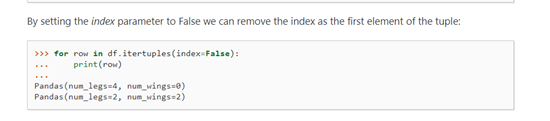

In [22]:

from geopy import distance

#find the distance between origin and destination
distances_km = []
for row in data.itertuples(index=False):
   distances_km.append(
       distance.distance(row.Org_lat_lon, row.Des_lat_lon).km
   )

data['Org_Dest_distance'] = distances_km
#df_dist.head()

#data=pd.concat([data, df_dist])

##### Add a day to DATE Column

Here we are adding a day(timedelta of (random.randint(0,3)) to the Date column in dataframe and creating a new column called as 'trip_end_date'

randint() is an inbuilt function of the random module in Python3. The random module gives access to various useful functions and one of them being able to generate random numbers, which is randint().

* we can use time.sleep(i) for delay, but it is not good idea to use that here.


In [23]:
#Null values in trip_end_date
import datetime
import random
df_sub=data[data['trip_end_date'].isna()]
for i in df_sub.index:
  if df_sub['ontime/delay'][i]==0:
    df_sub['trip_end_date'][i]=df_sub['actual_eta'][i]
  else:
    df_sub['trip_end_date'][i]=df_sub['Planned_ETA'][i]-datetime.timedelta(random.randint(0,3))

data=pd.concat([data, df_sub])

#as we have concatinationg those null in trip_end_date related rows are duplicates so removing those
data.dropna(subset=['trip_end_date'], inplace=True)


In [24]:
#feature like gps provider, data ping time, current location, curr_lat, curr_lon having null values in same rows
#all the above mentioned features are dependent on each other and it's not feasible to impute those, so dropping those rows

data.dropna(subset=['Current_Location'], inplace=True)

In [25]:
#checking the supplier code for the unknown suppliers
data[data['supplierNameCode']=='Unknown']['supplierID'].value_counts()

999    316
Name: supplierID, dtype: int64

In [26]:
#checking whether having driver's mobile number making any impact on ontime delivery
data['Driver_MobileNo'].values[data['Driver_MobileNo'].values>0]=1
data['Driver_MobileNo'].fillna(0, inplace=True)

In [27]:
data[data['Driver_MobileNo']==1]['ontime/delay'].value_counts()

0    2003
1     677
Name: ontime/delay, dtype: int64

In [28]:
data[data['Driver_MobileNo']==0]['ontime/delay'].value_counts()

0    2321
1     914
Name: ontime/delay, dtype: int64

### Explore the dataset

## DATA PREPROCESSING - Feature Encoding

In [29]:
#filtering data 
df_cln=data[['Market/Regular ',
       'vehicle_no',
       'Current_Location',
       'TRANSPORTATION_DISTANCE_IN_KM',
       'vehicleType', 'Driver_Name',
       'Driver_MobileNo', 'customerID', 'supplierID',
       'Material Shipped', 'ontime/delay',
       'vehicle_states', 'Origin_states', 'Dest_states', 'Org_Dest_distance']]

In [33]:
#making a copy of filtered data
df_copy=df_cln.copy()

##### Mapping Categorical Data in pandas
-------------------------------------------------------

In python, unlike R, there is no option to represent categorical data as factors. Factors in R are stored as vectors of integer values and can be labelled.


If we have our data in Series or Data Frames, we can convert these categories to numbers using pandas Series’ astype method and specify ‘categorical’.


***Nominal Categories:


Nominal categories are unordered e.g. colours, sex, nationality.


In the example below we categorise the Series vertebrates of the df dataframe into their individual categories.



By default the categories are ordered alphabetically, which is why in the example below Amphibian is represented by a zero.



import pandas as pd


df = pd.DataFrame({'vertebrates': ['Bird', 'Bird', 'Mammal', 'Fish', 'Amphibian', 'Reptile', 'Mammal']})

df.vertebrates.astype("category").cat.code



0    1

1    1

2    3

3    2

4    0

5    4

6    3

dtype: int8

You can always pass the types of vertebrates in separately so you have a record of the labels to match the categories.


Any missing categories in this case will be represented by -1


vertebrate_types = ['Mammal', 'Reptile', 'Bird', 'Amphibian', 'Fish']


df.vertebrates.astype("category", categories=vertebrate_types).cat.codes


0    2

1    2

2    0

3    4

4    3

5    1

6    0
dtype: int8

However, there is no inherent relationship between these categories so it doesn’t necessary make sense to store these as different numbers on the same scale.


***If we wanted to separate the distinct variables out into booleans as we would like for data science models such as, for example, linear regression, we can use pd.get_dummies.
___________________________________________________________________________________________________________________________
pd.get_dummies(df, columns=['vertebrates'])


vertebrates_Amphibian	vertebrates_Bird	vertebrates_Fish	vertebrates_Mammal	vertebrates_Reptile

0	0	1	0	0	0

1	0	1	0	0	0

2	0	0	0	1	0

3	0	0	1	0	0

4	1	0	0	0	0

5	0	0	0	0	1

6	0	0	0	1	0


***Ordinal Categories:


Ordinal categories are ordered, e.g. school grades, price ranges, salary bands.

For ordinal categorical data, you pass the parameter ordered = True to the astype method.

ordered_satisfaction = ['Very Unhappy', 'Unhappy', 'Neutral', 'Happy', 'Very Happy']

df = pd.DataFrame({'satisfaction':['Mad', 'Happy', 'Unhappy', 'Neutral']})

We can have the output categories as text, with NaN for any missing categories:

df.satisfaction.astype("category",
  ordered=True,
  categories=ordered_satisfaction
)
**********************************

0        NaN

1      Happy

2    Unhappy

3    Neutral

Name: satisfaction, dtype: category

Categories (5, object): [Very Unhappy < Unhappy < Neutral < Happy < Very Happy]
Or the output categories as numbers that map to the ordered categories. The number -1 is given to any missing category.

df.satisfaction.astype("category",
  ordered=True,
  categories=ordered_satisfaction
).cat.codes

0   -1

1    3

2    1

3    2
dtype: int8

In [33]:
#df_cln['GpsProvider']=df_cln.GpsProvider.astype("category").cat.codes
#df_cln['BookingID']=df_cln.BookingID.astype("category").cat.codes
df_cln['vehicle_no']=df_cln.vehicle_no.astype("category").cat.codes
df_cln['customerID']=df_cln.customerID.astype("category").cat.codes
df_cln['supplierID']=df_cln.supplierID.astype("category").cat.codes
#df_cln['Origin_Location']=df_cln.Origin_Location.astype("category").cat.codes
#df_cln['Destination_Location']=df_cln.Destination_Location.astype("category").cat.codes
df_cln['Current_Location']=df_cln.Current_Location.astype("category").cat.codes
df_cln['vehicleType']=df_cln.vehicleType.astype("category").cat.codes
#df_cln['customerNameCode']=df_cln.customerNameCode.astype("category").cat.codes
#df_cln['supplierNameCode']=df_cln.supplierNameCode.astype("category").cat.codes
df_cln['Material Shipped']=df_cln['Material Shipped'].astype("category").cat.codes
df_cln['Market/Regular ']=df_cln['Market/Regular '].astype("category").cat.codes
df_cln['Driver_Name']=df_cln['Driver_Name'].astype("category").cat.codes
df_cln['vehicle_states']=df_cln.vehicle_states.astype("category").cat.codes
df_cln['Origin_states']=df_cln['Origin_states'].astype("category").cat.codes
df_cln['Dest_states']=df_cln['Dest_states'].astype("category").cat.codes

## Exploratory Analysis - Corrolation

In [34]:
corr_matrix=df_cln.corr()
corr_matrix["ontime/delay"].sort_values(ascending=False)

ontime/delay                     1.000000
supplierID                       0.501116
vehicleType                      0.210720
vehicle_states                   0.203893
vehicle_no                       0.201877
Dest_states                      0.177922
Origin_states                    0.110234
Current_Location                 0.075365
Material Shipped                 0.013946
Driver_MobileNo                 -0.033591
TRANSPORTATION_DISTANCE_IN_KM   -0.077095
Market/Regular                  -0.125841
Org_Dest_distance               -0.233739
Driver_Name                     -0.244567
customerID                      -0.258463
Name: ontime/delay, dtype: float64

In [35]:
X=df_cln.drop('ontime/delay', axis=1)
y=df_cln['ontime/delay'].values

##### Correlation 

Method1: using "dataframe.corr()" in Pandas

The main intention of Seaborn heatmap is to visualize the correlation matrix of data for feature selection to solve business problems.

Keep in mind, mostly heatmap correlation use for feature selection from the dataset to build a Machine Learning model.


Method2: Using "scipy.stats.pearsonr(x, y)"

<AxesSubplot:>

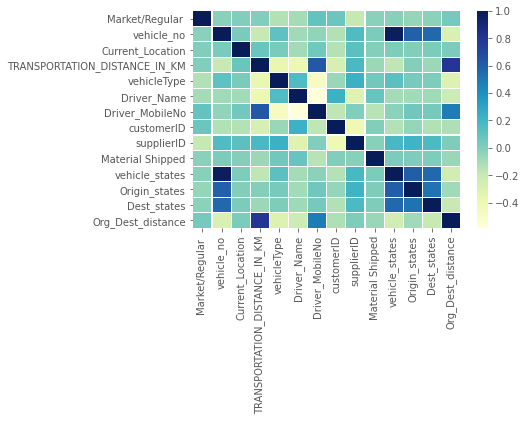

In [36]:
#Correlation in the X DataFrame
import seaborn as sns
sns.heatmap(X.corr(), cmap ="YlGnBu", linewidths = 0.1)

## Exploratory Analysis - Frequency Distribution

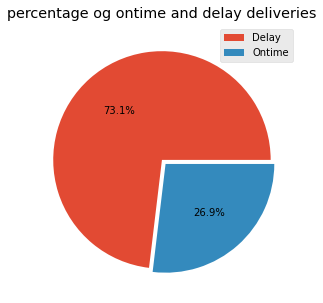

In [37]:
plt.rcParams['figure.figsize']=(5,5)
#explode = (0, 0.1, 0.2, 0.3, 0.4)
plt.pie(data['ontime/delay'].value_counts(), explode = (0, 0.05), autopct='%1.1f%%')
plt.title('percentage og ontime and delay deliveries')
plt.legend(['Delay', 'Ontime'])
plt.show()

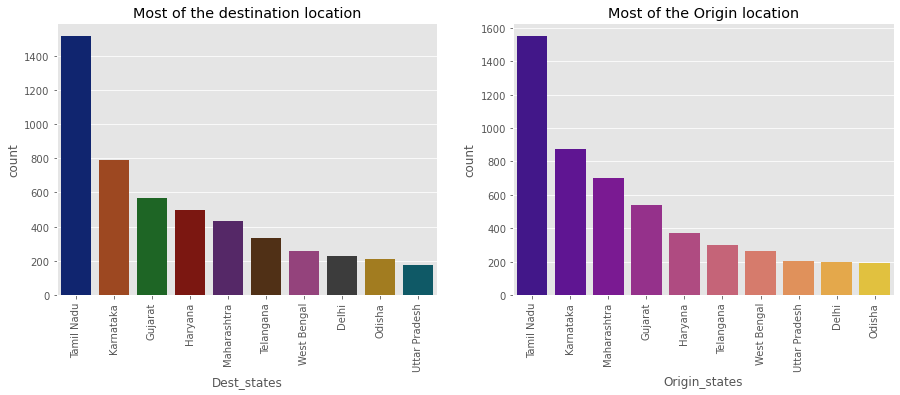

In [38]:
plt.rcParams['figure.figsize']=15,5

plt.subplot(121)
sns.countplot(data['Dest_states'],
             order=data['Dest_states'].value_counts().head(10).index,
             palette='dark')
plt.xticks(rotation=90)
plt.title('Most of the destination location')

plt.subplot(122)
sns.countplot(data['Origin_states'],
             order=data['Origin_states'].value_counts().head(10).index,
             palette='plasma')
plt.xticks(rotation=90)
plt.title('Most of the Origin location')

plt.show()

Using box-plot for display the outlier

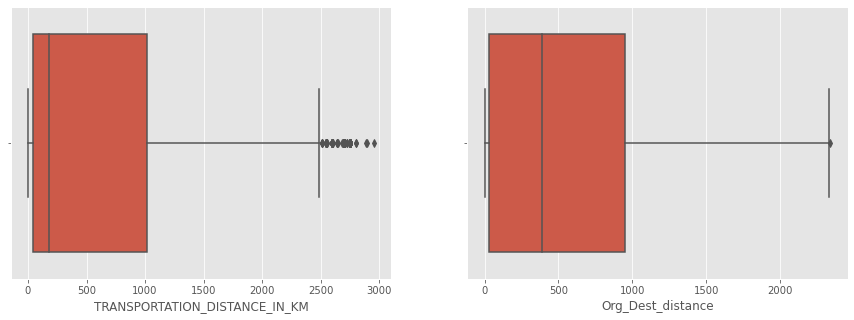

In [39]:
plt.subplot(121)
sns.boxplot(data['TRANSPORTATION_DISTANCE_IN_KM'])

plt.subplot(122)
sns.boxplot(data['Org_Dest_distance'])
plt.show()

we don't have major outliers in our data

## DATA PREPROCESSING - Scaling 

Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.

In [40]:
from sklearn.preprocessing import StandardScaler

#to_scale=df_cln.select_dtypes(include='number').columns.tolist()[1:-1]
sc=StandardScaler()
scaled=sc.fit_transform(X)
x_scl=pd.DataFrame(scaled, columns=X.columns)

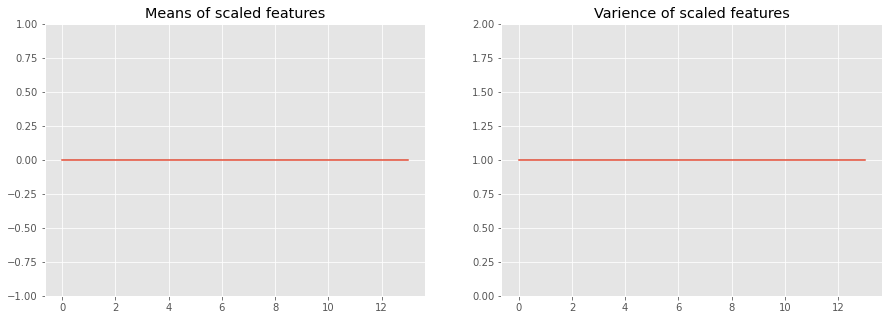

In [41]:
#check weathear data is standardized or not
plt.subplot(121)
plt.ylim(-1,1)

means=[]
for i in range(x_scl.shape[1]):
    means.append(np.mean(x_scl.iloc[:,i]))
plt.plot(means, scaley=False)
plt.title('Means of scaled features')

plt.subplot(122)
plt.ylim(0,2)
vars=[]
for i in range(x_scl.shape[1]):
    vars.append(np.var(x_scl.iloc[:,i]))
plt.plot(vars, scaley=False)
plt.title('Varience of scaled features')
plt.show()

dataset is well standardised

## Data Handling - Predictive / Supervised Learning - Logestic Regression

##### Modeling - Logistic Refression¶

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scl, y, test_size=0.25)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score

In [44]:
LR=LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [45]:
LR.score(X_test, y_test)

0.8390804597701149

In [46]:
LR.intercept_ #b0

array([-1.41816022])

In [47]:
LR.coef_ #coefficients of the features, b1, b2, ...

array([[-0.06843885, -0.02676388,  0.02483979,  0.03143645,  0.20852394,
        -0.33136269,  0.30750201, -0.21395034,  1.1189893 ,  0.08111584,
         0.17985453, -0.25151605,  0.13160153, -0.9015733 ]])

In [48]:
#To be able to test we need to scale the test data too (X part only) 
#using the same scaler that was used to scale the training data
X_test_scaled = sc.transform(X_test)

In [49]:
#Predict_proba gives the probabilities P(y=Ci|x)
LR.predict_proba(X_test_scaled)

array([[0.76160184, 0.23839816],
       [0.77584546, 0.22415454],
       [0.76668203, 0.23331797],
       ...,
       [0.80702005, 0.19297995],
       [0.92291412, 0.07708588],
       [0.91794688, 0.08205312]])

In [50]:
probabilities_test = LR.predict_proba(X_test_scaled)[:,1]
probabilities_test[10:20] #second column belongs to class 1, ie, p = P(y=1|x)

array([0.07582281, 0.23162367, 0.23200974, 0.21551502, 0.0791765 ,
       0.07565054, 0.96822048, 0.07764066, 0.07664843, 0.0778721 ])

In [51]:
#Whereas predict method gives the class prediction as either 0 or 1
y_pred_LR=LR.predict(X_test)
y_pred_LR[10:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [52]:
#Predictions based on a different threshold value
from sklearn.preprocessing import binarize
y_predict_thresh = binarize(probabilities_test.reshape(-1,1),threshold=0.75)
y_predict_thresh[10:20]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.]])

In [53]:
#Performance measures for classification
#Accuracy = total no. of correct prediction/total no. of datapoints

LR.score(X_test_scaled,y_test)

0.7349560513860717

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_pred_LR)

0.8390804597701149

In [55]:
'''
        Predicted
        0   1
True  0 TN  FP
      1 FN  TP

'''
cm1 = confusion_matrix(y_test,y_pred_LR)
cm1

array([[1027,   52],
       [ 186,  214]], dtype=int64)

In [56]:
#Confusion matrix corresponding prob threshold = 0.75
cm2 = confusion_matrix(y_test,y_predict_thresh)
cm2

array([[1077,    2],
       [ 390,   10]], dtype=int64)

In [57]:
#Fpr = fp/(tn+fp)
#tpr = tp/(fn+tp)

fpr1= 26/1069
fpr2 = 7/1033

tpr1 = 160/410
tpr2 = 192/410

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_LR))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1079
           1       0.80      0.54      0.64       400

    accuracy                           0.84      1479
   macro avg       0.83      0.74      0.77      1479
weighted avg       0.84      0.84      0.83      1479



###### The confusion matrix used in supervised learning

Confusion Matrix mainly used for the classification algorithms which fall under supervised learning. Using the above positive and negative targets information table, we will populate the matrix which gives a much more clear understanding of how the confusion matrix constructed.

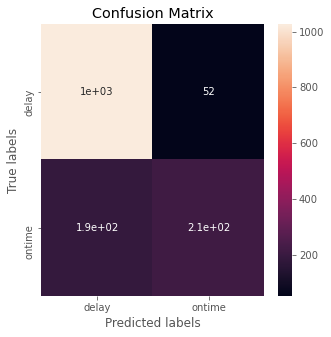

In [59]:
plt.rcParams['figure.figsize']=5,5
ax= plt.subplot()
cm = confusion_matrix(y_test, y_pred_LR)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['delay', 'ontime']); ax.yaxis.set_ticklabels(['delay', 'ontime']);

In [60]:
#METHOD1:GET ROC GRAPH

#ROC is the curve traced by the co-ordinates (FPR,TPR) 
#for different probability threshold values
#AUC is the area under the ROC curve

from sklearn.metrics import roc_auc_score, roc_curve
#y_pred_prob = LR.predict_proba(X_test_scaled)[:,1]

#fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

#METHOD2:GET ROC GRAPH

fpr, tpr, thres = roc_curve(y_test, LR.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

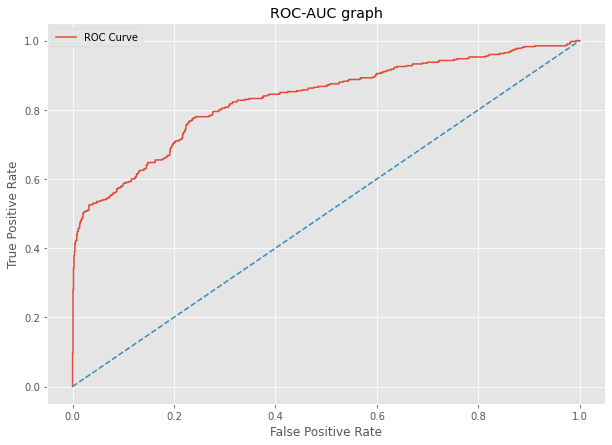

In [61]:
plt.rcParams['figure.figsize']=10,7
plt.plot(fpr, tpr, label = 'ROC Curve' %roc_auc)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC-AUC graph')
plt.show()

AUC is an excellent performance measure for Logistic Regression Model as it is robust against probability threshold values and truly depicts if the model is good or not for the data at hand. The closer the score to 1, the better. If the score is near 0.5, it means that Logistic Regression is not a good fit for the data. Either we need to get more discriminative features to help identify the target class or look for other model options (may be a complex non-linear model)

###### A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

In [62]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.feature_selection import SelectFromModel

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [64]:
RF =RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

In [65]:
RF.score(X_test, y_test)

0.8945233265720081

In [66]:
y_pred_RF=RF.predict(X_test)

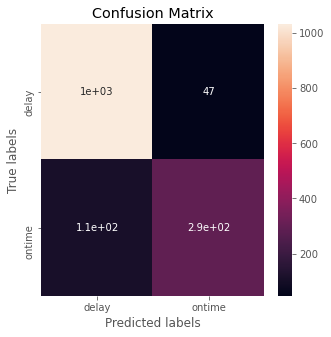

In [67]:
plt.rcParams['figure.figsize']=5,5
ax= plt.subplot()
cm = confusion_matrix(y_test, y_pred_RF)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['delay', 'ontime']); ax.yaxis.set_ticklabels(['delay', 'ontime']);

In [68]:
fpr, tpr, thres = roc_curve(y_test, RF.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

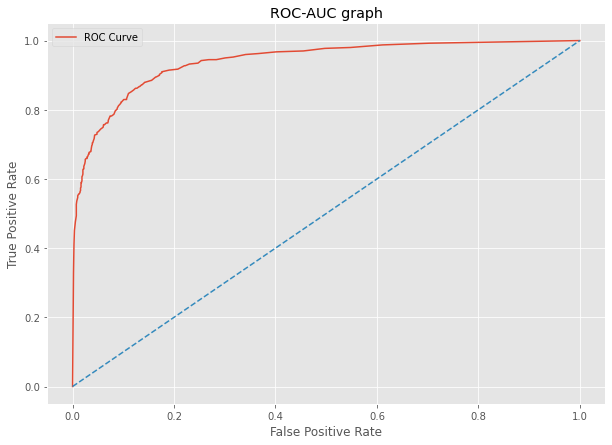

In [69]:
plt.rcParams['figure.figsize']=10,7
plt.plot(fpr, tpr, label = 'ROC Curve' %roc_auc)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC-AUC graph')
plt.show()

Selecting most helping Parametes

Below we have plotted a bar chart of global feature importance based on weights derived from logistic regression. We can use it to compare it with the bar chart generated for individual data samples.

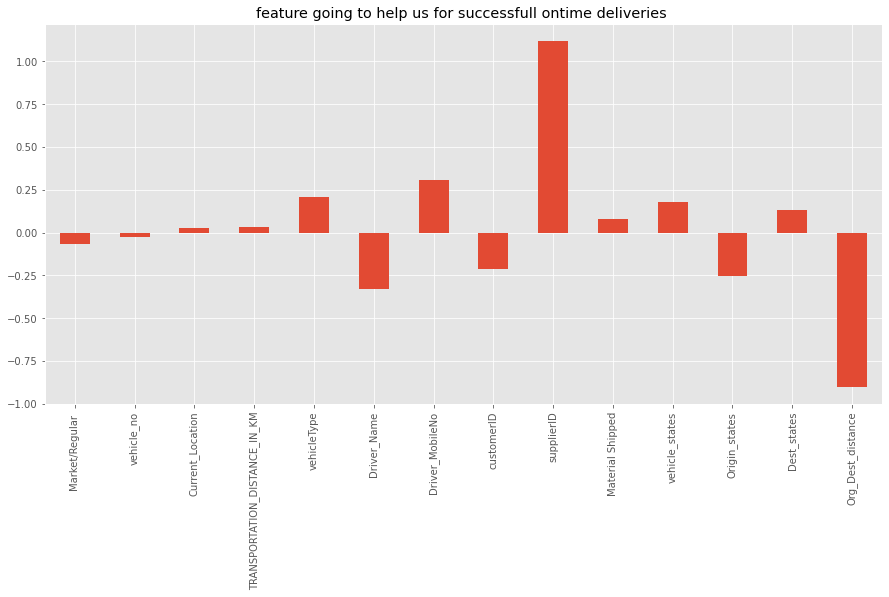

In [70]:
plt.rcParams['figure.figsize']=15,7
plt.style.use('ggplot')
weights=pd.Series(LR.coef_[0], index=['Market/Regular ', 'vehicle_no', 'Current_Location',
       'TRANSPORTATION_DISTANCE_IN_KM', 'vehicleType', 'Driver_Name',
       'Driver_MobileNo', 'customerID', 'supplierID', 'Material Shipped',
       'vehicle_states', 'Origin_states', 'Dest_states', 'Org_Dest_distance'])

params_weight =weights.plot(kind='bar', title='feature going to help us for successfull ontime deliveries ')
plt.style.use('ggplot')
fig=params_weight.get_figure() 
plt.show()

### CONCLUSION

#### Parameters that impact on ontime delivery:
-Current location

-Transportation distance

-Vehicle state

-Vehicle type

-Driver mobile number

-Supplier

-material shipped

-Destination state

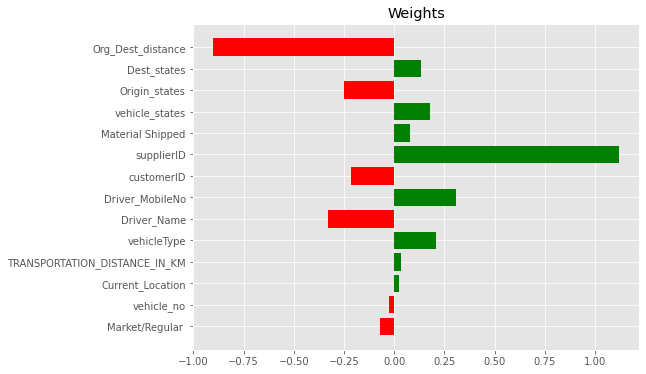

In [71]:
with plt.style.context("ggplot"):
    fig = plt.figure(figsize=(8,6))
    plt.barh(range(len(LR.coef_[0])), LR.coef_[0], color=["red" if coef<0 else "green" for coef in LR.coef_[0]])
    plt.yticks(range(len(LR.coef_[0])), ['Market/Regular ', 'vehicle_no', 'Current_Location',
       'TRANSPORTATION_DISTANCE_IN_KM', 'vehicleType', 'Driver_Name',
       'Driver_MobileNo', 'customerID', 'supplierID', 'Material Shipped',
       'vehicle_states', 'Origin_states', 'Dest_states', 'Org_Dest_distance']);
    plt.title("Weights")